# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Badar
- **Email:** ahmadbadar145@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penyewaan sepeda per jam berbeda antara musim panas dan musim dingin?
2. Musim manakah yang memiliki jumlah penyewaan sepeda tertinggi secara keseluruhan?

## Import Semua Packages/Library yang Digunakan

In [4]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
# Memeriksa tipe data dari setiap kolom yang terdapat dalam hour_df dan day_df
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [9]:
# Mengecek keberadaan nilai yang hilang (missing values) di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
# Mengecek keberadaan nilai yang hilang (missing values) di dataset day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
# Memeriksa duplikasi data dalam dataset
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [12]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

1. Kolom workingday sudah diwakili oleh kolom weekday, sedangkan kolom instant tidak relevan. Oleh karena itu, kita perlu menghapus kolom instant dan workingday.
2. Selanjutnya, kita akan mengubah tipe data kolom season, mnth, holiday, weekday, dan weathersit dari int menjadi category, karena kolom-kolom tersebut berisi data kategorikal dengan beberapa varian.
3. Kolom dteday, yang saat ini bertipe object, akan diubah menjadi tipe datetime untuk memudahkan analisis tanggal.
4. Selain itu, kita akan mengganti nama kolom agar lebih mudah dibaca dan mengonversi isi kolom menjadi format yang lebih mudah dipahami.
5. Terakhir, kita akan membuat kolom baru bernama category_days yang menunjukkan apakah isi kolom tersebut adalah akhir pekan (weekend) atau hari kerja (weekdays).

Dropping

In [14]:
# Menghapus kolom dari day_df jika kolom tersebut ada
if 'workingday' in day_df.columns:
    day_df.drop(columns=['workingday'], inplace=True)

# Cleaning Data for hour_df
# Menghapus kolom 'instant' jika kolom tersebut ada
if 'instant' in hour_df.columns:
    hour_df.drop(columns=['instant'], inplace=True)


Mengubah Tipe Data

In [15]:
# Mengubah tipe data dari int ke category
# List kolom dengan tipe data int yang harus diubah menjadi category di day_df
int_to_category_day = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
day_df[int_to_category_day] = day_df[int_to_category_day].astype('category')

# List kolom dengan tipe data int yang harus diubah menjadi category di hour_df
int_to_category_hour = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
hour_df[int_to_category_hour] = hour_df[int_to_category_hour].astype('category')

# Mengubah tipe data dari object ke datetime jika kolom 'dteday' ada
if 'dteday' in day_df.columns:
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])

if 'dteday' in hour_df.columns:
    hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menampilkan tipe data kolom setelah perubahan untuk verifikasi
print("\nTipe data setelah perubahan di day_df:")
print(day_df.dtypes)

print("\nTipe data setelah perubahan di hour_df:")
print(hour_df.dtypes)


Tipe data setelah perubahan di day_df:
instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
holiday             category
weekday             category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Tipe data setelah perubahan di hour_df:
dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
hr                     int64
holiday             category
weekday             category
workingday             int64
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype:

Mengubah Nama Kolom

Kolom di dataset day

In [16]:
# Menampilkan nama kolom asli sebelum mengganti nama
print("Nama kolom asli di day_df:")
print(day_df.columns)

# Mengganti nama kolom agar lebih mudah dibaca
day_df.rename(columns={
    'dteday': 'date',              # Mengganti 'dteday' dengan 'date'
    'season': 'season_category',   # Mengganti 'season' dengan 'season_category'
    'mnth': 'month',               # Mengganti 'mnth' dengan 'month'
    'holiday': 'is_holiday',       # Mengganti 'holiday' dengan 'is_holiday'
    'weekday': 'weekday_category', # Mengganti 'weekday' dengan 'weekday_category'
    'weathersit': 'weather_situation', # Mengganti 'weathersit' dengan 'weather_situation'
    'temp': 'temperature',         # Misalnya, mengganti 'temp' dengan 'temperature'
    'atemp': 'apparent_temperature', # Misalnya, mengganti 'atemp' dengan 'apparent_temperature'
    'hum': 'humidity',             # Misalnya, mengganti 'hum' dengan 'humidity'
    'windspeed': 'wind_speed',     # Misalnya, mengganti 'windspeed' dengan 'wind_speed'
    'casual': 'casual_rentals',    # Misalnya, mengganti 'casual' dengan 'casual_rentals'
    'registered': 'registered_rentals', # Misalnya, mengganti 'registered' dengan 'registered_rentals'
    'count': 'total_rentals'       # Misalnya, mengganti 'count' dengan 'total_rentals'
}, inplace=True)

# Menampilkan nama kolom setelah mengganti nama
print("\nNama kolom setelah diganti di day_df:")
print(day_df.columns)

Nama kolom asli di day_df:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Nama kolom setelah diganti di day_df:
Index(['instant', 'date', 'season_category', 'yr', 'month', 'is_holiday',
       'weekday_category', 'weather_situation', 'temperature',
       'apparent_temperature', 'humidity', 'wind_speed', 'casual_rentals',
       'registered_rentals', 'cnt'],
      dtype='object')


Kolom di dataset hour

In [17]:
# Menampilkan nama kolom asli sebelum mengganti nama
print("Nama kolom asli di hour_df:")
print(hour_df.columns)

# Mengganti nama kolom agar lebih mudah dibaca
hour_df.rename(columns={
    'dteday': 'date',              # Mengganti 'dteday' dengan 'date'
    'season': 'season_category',   # Mengganti 'season' dengan 'season_category'
    'mnth': 'month',               # Mengganti 'mnth' dengan 'month'
    'holiday': 'is_holiday',       # Mengganti 'holiday' dengan 'is_holiday'
    'weekday': 'weekday_category', # Mengganti 'weekday' dengan 'weekday_category'
    'weathersit': 'weather_situation', # Mengganti 'weathersit' dengan 'weather_situation'
    'temp': 'temperature',         # Misalnya, mengganti 'temp' dengan 'temperature'
    'atemp': 'apparent_temperature', # Misalnya, mengganti 'atemp' dengan 'apparent_temperature'
    'hum': 'humidity',             # Misalnya, mengganti 'hum' dengan 'humidity'
    'windspeed': 'wind_speed',     # Misalnya, mengganti 'windspeed' dengan 'wind_speed'
    'casual': 'casual_rentals',    # Misalnya, mengganti 'casual' dengan 'casual_rentals'
    'registered': 'registered_rentals', # Misalnya, mengganti 'registered' dengan 'registered_rentals'
    'count': 'total_rentals'       # Misalnya, mengganti 'count' dengan 'total_rentals'
}, inplace=True)

# Menampilkan nama kolom setelah mengganti nama
print("\nNama kolom setelah diganti di hour_df:")
print(hour_df.columns)

Nama kolom asli di hour_df:
Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Nama kolom setelah diganti di hour_df:
Index(['date', 'season_category', 'yr', 'month', 'hr', 'is_holiday',
       'weekday_category', 'workingday', 'weather_situation', 'temperature',
       'apparent_temperature', 'humidity', 'wind_speed', 'casual_rentals',
       'registered_rentals', 'cnt'],
      dtype='object')


Membuat kolom baru bernama category_days yang menunjukkan apakah isi kolom tersebut termasuk 'weekend' atau 'weekdays'

In [18]:
# Membuat kolom baru 'category_days' di day_df
day_df['category_days'] = day_df['weekday_category'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')

# Membuat kolom baru 'category_days' di hour_df
hour_df['category_days'] = hour_df['weekday_category'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')

# Menampilkan beberapa baris pertama untuk memverifikasi
print("Beberapa baris pertama di day_df dengan kolom 'category_days':")
print(day_df.head())

print("\nBeberapa baris pertama di hour_df dengan kolom 'category_days':")
print(hour_df.head())

Beberapa baris pertama di day_df dengan kolom 'category_days':
   instant       date season_category  yr month is_holiday weekday_category  \
0        1 2011-01-01               1   0     1          0                6   
1        2 2011-01-02               1   0     1          0                0   
2        3 2011-01-03               1   0     1          0                1   
3        4 2011-01-04               1   0     1          0                2   
4        5 2011-01-05               1   0     1          0                3   

  weather_situation  temperature  apparent_temperature  humidity  wind_speed  \
0                 2     0.344167              0.363625  0.805833    0.160446   
1                 2     0.363478              0.353739  0.696087    0.248539   
2                 1     0.196364              0.189405  0.437273    0.248309   
3                 1     0.200000              0.212122  0.590435    0.160296   
4                 1     0.226957              0.229270  0.4369

## Exploratory Data Analysis (EDA)

Explore Data day_df

In [20]:
# Melihat rangkuman statistik dari data day_df
print("Rangkuman statistik dari data day_df:")
print(day_df.describe(include='all'))

Rangkuman statistik dari data day_df:
           instant                 date  season_category          yr  month  \
count   731.000000                  731            731.0  731.000000  731.0   
unique         NaN                  NaN              4.0         NaN   12.0   
top            NaN                  NaN              3.0         NaN    1.0   
freq           NaN                  NaN            188.0         NaN   62.0   
mean    366.000000  2012-01-01 00:00:00              NaN    0.500684    NaN   
min       1.000000  2011-01-01 00:00:00              NaN    0.000000    NaN   
25%     183.500000  2011-07-02 12:00:00              NaN    0.000000    NaN   
50%     366.000000  2012-01-01 00:00:00              NaN    1.000000    NaN   
75%     548.500000  2012-07-01 12:00:00              NaN    1.000000    NaN   
max     731.000000  2012-12-31 00:00:00              NaN    1.000000    NaN   
std     211.165812                  NaN              NaN    0.500342    NaN   

        is_ho

In [23]:
# Melihat jumlah penyewaan sepeda berdasarkan musim
season_rentals = day_df.groupby('season_category')['cnt'].sum().sort_values(ascending=False).reset_index()

print("\nJumlah penyewaan sepeda berdasarkan musim:")
print(season_rentals.head(10))


Jumlah penyewaan sepeda berdasarkan musim:
  season_category      cnt
0               3  1061129
1               2   918589
2               4   841613
3               1   471348


<ipython-input-23-af93afe0bcee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = day_df.groupby('season_category')['cnt'].sum().sort_values(ascending=False).reset_index()


Jumlah penyewaan sepeda bervariasi berdasarkan musim, dengan kategori musim 3 (musim panas) mencatatkan jumlah penyewaan tertinggi sebesar 1.061.129. Kategori musim 2 (musim semi) berada di posisi kedua dengan 918.589 penyewaan, diikuti oleh kategori musim 4 (musim gugur) dengan 841.613 penyewaan. Kategori musim 1 (musim dingin) memiliki jumlah penyewaan terendah, yaitu 471.348.

In [27]:
# Cek nama kolom untuk memastikan kolom yang digunakan benar
print(day_df.columns)

# Melihat jumlah penyewaan sepeda tiap tahun berdasarkan 'registered' dan 'casual'
annual_rentals = day_df.groupby('yr')[['registered_rentals', 'casual_rentals']].sum().reset_index()

print("\nJumlah penyewaan sepeda tiap tahun berdasarkan 'registered' dan 'casual':")
print(annual_rentals)

Index(['instant', 'date', 'season_category', 'yr', 'month', 'is_holiday',
       'weekday_category', 'weather_situation', 'temperature',
       'apparent_temperature', 'humidity', 'wind_speed', 'casual_rentals',
       'registered_rentals', 'cnt', 'category_days'],
      dtype='object')

Jumlah penyewaan sepeda tiap tahun berdasarkan 'registered' dan 'casual':
   yr  registered_rentals  casual_rentals
0   0              995851          247252
1   1             1676811          372765


Berdasarkan data yang tersedia, jumlah penyewaan sepeda menunjukkan peningkatan signifikan dari tahun ke tahun. Pada tahun pertama (tahun 0), total penyewaan sepeda adalah 995.851, dengan 247.252 penyewaan casual dan 748.599 penyewaan registered. Pada tahun kedua (tahun 1), jumlah total penyewaan meningkat menjadi 1.676.811, terdiri dari 372.765 penyewaan casual dan 1.304.046 penyewaan registered.

Explore Data hour_df

In [29]:
# Melihat rangkuman statistik dari data hour_df
print("Rangkuman statistik dari data hour_df:")
print(hour_df.describe(include='all'))

Rangkuman statistik dari data hour_df:
                                 date  season_category            yr    month  \
count                           17379          17379.0  17379.000000  17379.0   
unique                            NaN              4.0           NaN     12.0   
top                               NaN              3.0           NaN      5.0   
freq                              NaN           4496.0           NaN   1488.0   
mean    2012-01-02 04:08:34.552045568              NaN      0.502561      NaN   
min               2011-01-01 00:00:00              NaN      0.000000      NaN   
25%               2011-07-04 00:00:00              NaN      0.000000      NaN   
50%               2012-01-02 00:00:00              NaN      1.000000      NaN   
75%               2012-07-02 00:00:00              NaN      1.000000      NaN   
max               2012-12-31 00:00:00              NaN      1.000000      NaN   
std                               NaN              NaN      0.500008  

In [30]:
# Melihat jumlah penyewaan sepeda berdasarkan jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

print("\nJumlah penyewaan sepeda berdasarkan jam:")
print(hourly_rentals)


Jumlah penyewaan sepeda berdasarkan jam:
    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


Jumlah penyewaan sepeda berdasarkan jam menunjukkan bahwa penyewaan sepeda mengalami puncaknya pada jam-jam sibuk di siang dan sore hari. Jam 17:00 hingga 18:00 mencatat jumlah penyewaan tertinggi dengan total 336.860 penyewaan, diikuti oleh jam 12:00 hingga 13:00 dengan 184.919 penyewaan. Sebaliknya, jumlah penyewaan paling rendah terjadi pada dini hari, khususnya antara jam 00:00 hingga 05:00, dengan angka yang jauh lebih rendah, yaitu di bawah 15.000 penyewaan per jam.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda per jam berbeda antara musim panas dan musim dingin?

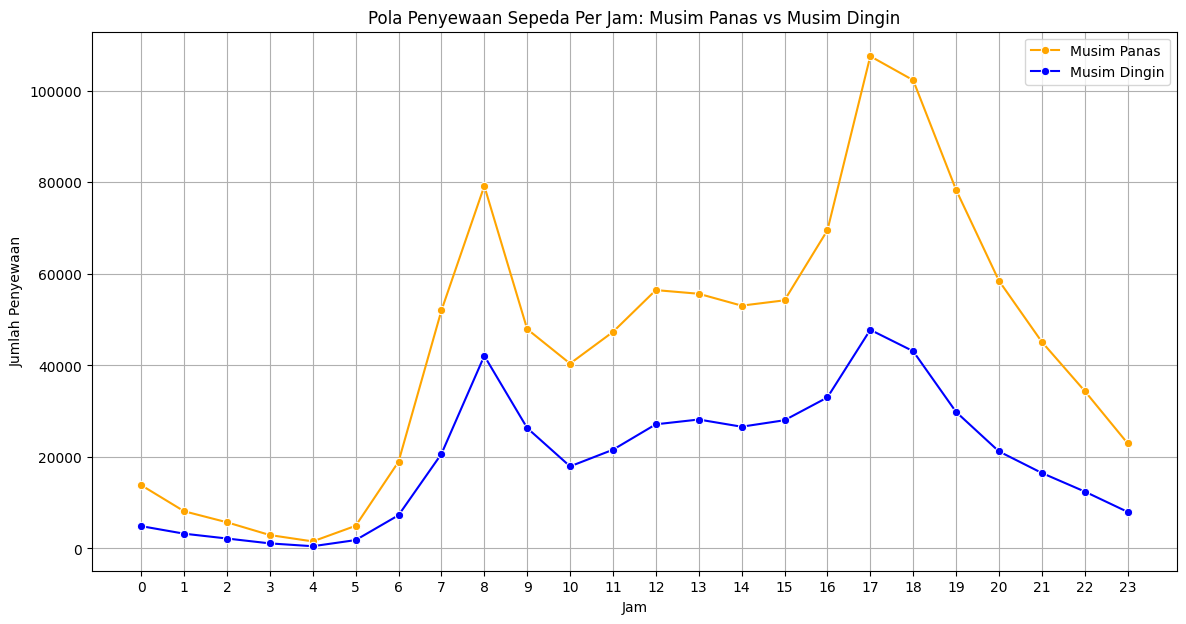

In [31]:
# Filter data untuk musim panas (season_category == 3) dan musim dingin (season_category == 1)
summer_hours = hour_df[hour_df['season_category'] == 3]
winter_hours = hour_df[hour_df['season_category'] == 1]

# Mengelompokkan data berdasarkan jam dan menghitung jumlah penyewaan
summer_hourly_rentals = summer_hours.groupby('hr')['cnt'].sum().reset_index()
winter_hourly_rentals = winter_hours.groupby('hr')['cnt'].sum().reset_index()

# Visualisasi pola penyewaan per jam untuk musim panas dan musim dingin
plt.figure(figsize=(14, 7))

# Plot untuk musim panas
sns.lineplot(x='hr', y='cnt', data=summer_hourly_rentals, marker='o', label='Musim Panas', color='orange')

# Plot untuk musim dingin
sns.lineplot(x='hr', y='cnt', data=winter_hourly_rentals, marker='o', label='Musim Dingin', color='blue')

plt.title('Pola Penyewaan Sepeda Per Jam: Musim Panas vs Musim Dingin')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))  # Menampilkan jam dari 0 hingga 23
plt.legend()
plt.grid(True)
plt.show()

Hasil visualisasi pola penyewaan sepeda per jam menunjukkan perbedaan mencolok antara musim panas dan musim dingin.

*  Musim Panas: Pada musim panas, jumlah penyewaan sepeda mencapai puncaknya selama jam-jam sibuk, terutama pada jam pagi (sekitar pukul 08:00 hingga 09:00) dan sore hari (sekitar pukul 17:00 hingga 18:00). Grafik menunjukkan bahwa penyewaan sepeda lebih tinggi selama jam-jam ini, kemungkinan besar karena cuaca yang lebih hangat dan aktivitas luar ruangan yang lebih tinggi.

*  Musim Dingin: Sebaliknya, pada musim dingin, jumlah penyewaan sepeda jauh lebih rendah sepanjang hari, dengan penurunan signifikan pada jam pagi dan malam hari. Penyewaan meningkat sedikit pada jam-jam siang, namun tidak sebanyak pada musim panas. Hal ini kemungkinan disebabkan oleh suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung aktivitas luar ruangan.

Kesimpulannya, musim panas menunjukkan pola penggunaan sepeda yang lebih aktif dan merata sepanjang hari dibandingkan dengan musim dingin, di mana penggunaan sepeda cenderung lebih rendah dan kurang teratur.

### Pertanyaan 2: Musim manakah yang memiliki jumlah penyewaan sepeda tertinggi secara keseluruhan?

<ipython-input-41-8ccae4b30c1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total_Rentals', data=seasonal_rentals, palette='viridis')


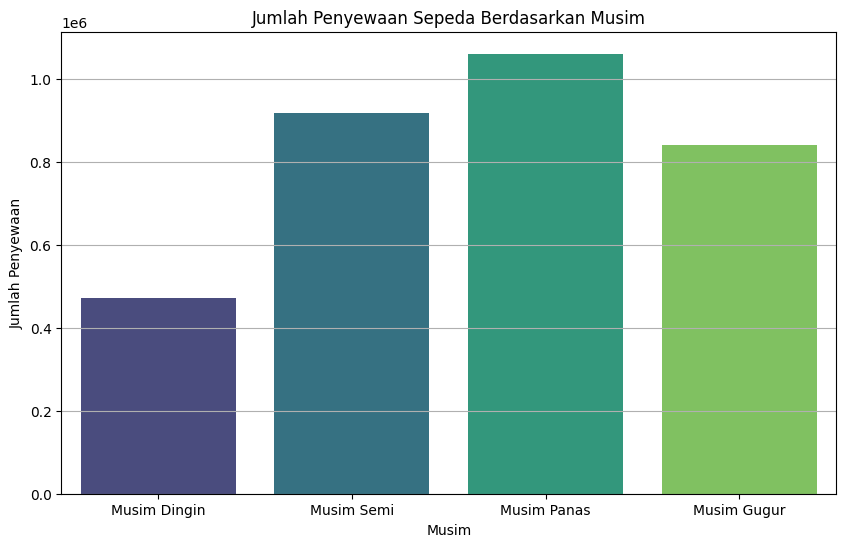

In [41]:
plt.figure(figsize=(10, 6))

# Plot jumlah penyewaan per musim
sns.barplot(x='Season', y='Total_Rentals', data=seasonal_rentals, palette='viridis')

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(4), labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.grid(axis='y')
plt.show()

Hasil visualisasi jumlah penyewaan sepeda berdasarkan musim mengungkapkan informasi berikut:

*  Musim Panas (Season 3) memiliki jumlah penyewaan sepeda tertinggi secara keseluruhan dibandingkan dengan musim lainnya. Jumlah penyewaan yang tinggi selama musim panas mencerminkan minat dan aktivitas luar ruangan yang meningkat selama bulan-bulan yang lebih hangat.

*  Musim Semi (Season 2) dan Musim Gugur (Season 4) juga menunjukkan jumlah penyewaan yang signifikan, namun tidak setinggi musim panas. Penyewaan selama musim semi dan gugur lebih moderat, mungkin karena suhu yang lebih nyaman dibandingkan musim dingin, tetapi tidak seintens musim panas.

*  Musim Dingin (Season 1) memiliki jumlah penyewaan terendah. Ini konsisten dengan pengamatan bahwa cuaca dingin cenderung mengurangi aktivitas luar ruangan, termasuk penyewaan sepeda.

Kesimpulannya, musim panas adalah periode dengan jumlah penyewaan sepeda tertinggi, sedangkan musim dingin menunjukkan jumlah penyewaan yang paling rendah. Musim semi dan gugur menunjukkan angka penyewaan yang lebih moderat, dengan musim semi sedikit lebih tinggi dibandingkan musim gugur.

## Conclusion

1. Pola Penyewaan Sepeda Per Jam antara Musim Panas dan Musim Dingin:

  Pola penyewaan sepeda per jam menunjukkan perbedaan signifikan antara musim panas dan musim dingin. Pada musim panas, penyewaan sepeda mencapai puncaknya pada jam-jam sibuk, seperti pagi hari (sekitar pukul 08:00 hingga 09:00) dan sore hari (sekitar pukul 17:00 hingga 18:00), dengan aktivitas yang lebih merata sepanjang hari. Hal ini mencerminkan tingkat aktivitas luar ruangan yang tinggi dan cuaca yang mendukung. Sebaliknya, pada musim dingin, jumlah penyewaan sepeda jauh lebih rendah, dengan penurunan signifikan terutama pada pagi dan malam hari. Penyewaan meningkat sedikit pada siang hari, namun tetap jauh lebih rendah dibandingkan dengan musim panas. Hal ini menunjukkan bahwa suhu dingin dan kondisi cuaca yang kurang mendukung mengurangi minat untuk menyewa sepeda.

2. Musim dengan Jumlah Penyewaan Sepeda Tertinggi Secara Keseluruhan:

  Musim panas (Season 3) adalah musim dengan jumlah penyewaan sepeda tertinggi secara keseluruhan. Jumlah penyewaan yang tinggi selama musim panas mencerminkan tingkat minat dan aktivitas luar ruangan yang meningkat pada bulan-bulan yang lebih hangat. Musim semi (Season 2) dan musim gugur (Season 4) juga menunjukkan jumlah penyewaan yang signifikan, namun tidak setinggi musim panas. Musim semi menunjukkan angka penyewaan yang sedikit lebih tinggi dibandingkan musim gugur. Sebaliknya, musim dingin (Season 1) memiliki jumlah penyewaan terendah, yang konsisten dengan pengamatan bahwa suhu dingin mengurangi aktivitas luar ruangan.

# Teknik Analisis Lanjutan (RFM Analysis)



In [46]:
# Hitung Recency
latest_date = day_df['date'].max()
day_df['Recency'] = (latest_date - day_df['date']).dt.days

# Hitung Frequency (total penyewaan per hari)
daily_rentals = day_df.groupby('date')['cnt'].sum().reset_index()
daily_rentals.rename(columns={'cnt': 'Frequency'}, inplace=True)

# Gabungkan data Recency dan Frequency
rfm_df = pd.merge(day_df[['date', 'Recency']].drop_duplicates(), daily_rentals, on='date')

# Hitung Monetary (jumlah total penyewaan per hari)
monetary_df = daily_rentals.copy()
monetary_df.rename(columns={'Frequency': 'Monetary'}, inplace=True)

# Gabungkan data Recency, Frequency, dan Monetary
rfm_df = pd.merge(rfm_df, monetary_df[['date', 'Monetary']], on='date')

# Melihat data RFM
print("Data RFM:")
print(rfm_df.head())

# Segmentasi berdasarkan quantile
rfm_df['Recency_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['Frequency_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_df['Monetary_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Hitung RFM Score
rfm_df['RFM_Score'] = rfm_df['Recency_Score'].astype(str) + rfm_df['Frequency_Score'].astype(str) + rfm_df['Monetary_Score'].astype(str)

# Menampilkan hasil segmentasi RFM
print("\nSegmentasi RFM:")
print(rfm_df[['date', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())

Data RFM:
        date  Recency  Frequency  Monetary
0 2011-01-01      730        985       985
1 2011-01-02      729        801       801
2 2011-01-03      728       1349      1349
3 2011-01-04      727       1562      1562
4 2011-01-05      726       1600      1600

Segmentasi RFM:
        date  Recency  Frequency  Monetary RFM_Score
0 2011-01-01      730        985       985       111
1 2011-01-02      729        801       801       111
2 2011-01-03      728       1349      1349       111
3 2011-01-04      727       1562      1562       111
4 2011-01-05      726       1600      1600       111
